In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

# View the first 8 rows
df.head(8)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0


In [3]:
# statistical info on the dataset

df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
df.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

<AxesSubplot:>

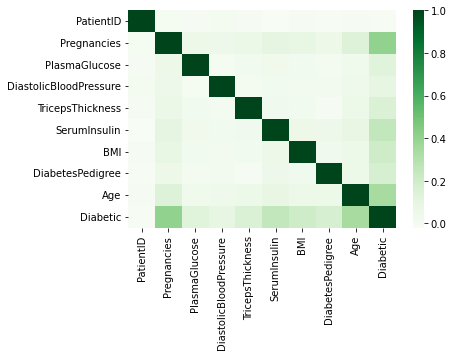

In [6]:
sns.heatmap(df.corr(), cmap="Greens")

In [7]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

<strong>We shall plot a histogram for the numerical variables</strong>

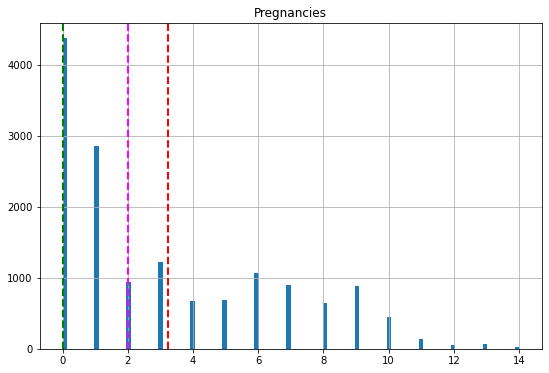

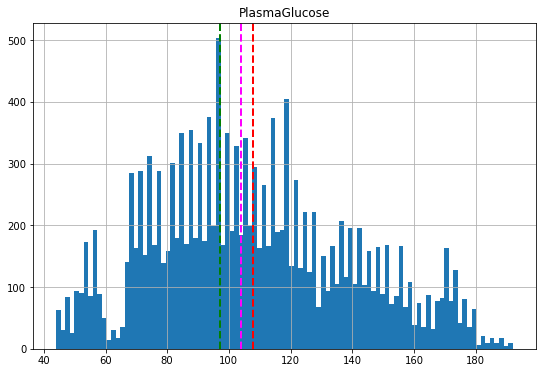

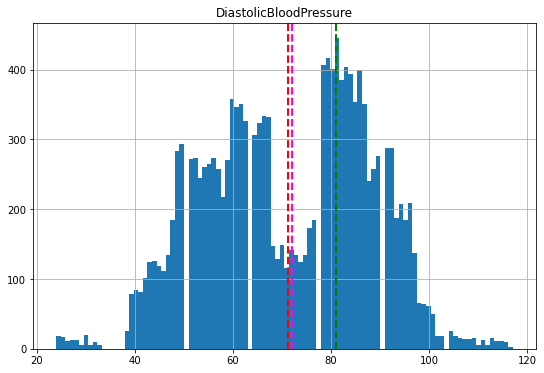

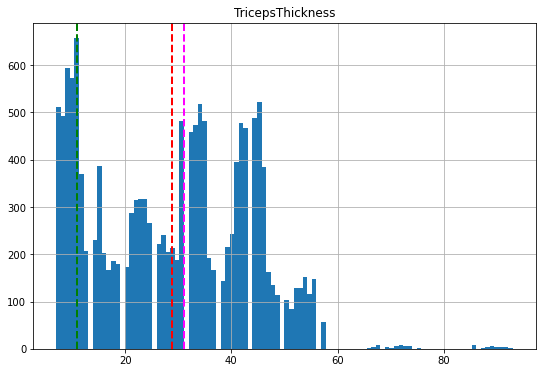

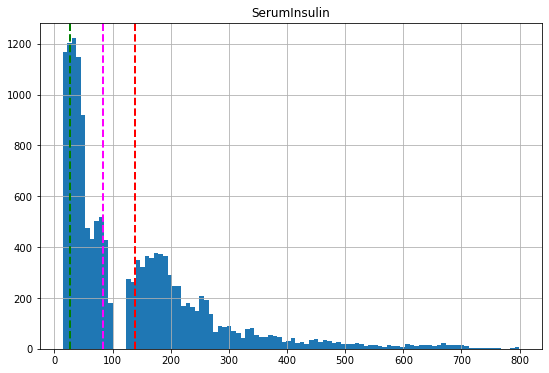

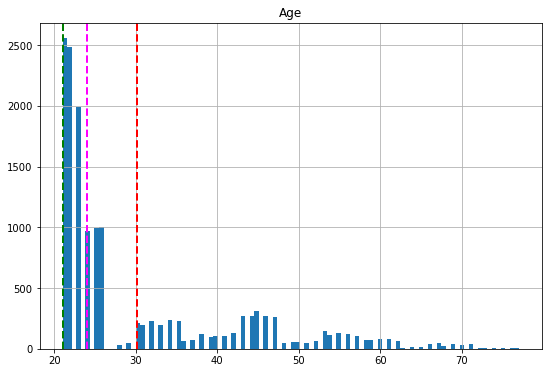

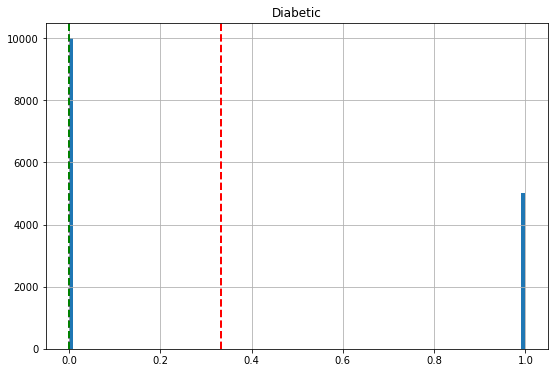

In [8]:
numerical_features = ["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure", "TricepsThickness", "SerumInsulin","Age", "Diabetic"]

for columns in numerical_features:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    
    col = df[columns]
    col.hist(bins=100, ax=ax)
    
    ax.axvline(col.mean(), color="red", linewidth=2.0, linestyle="dashed")
    ax.axvline(col.median(), color="magenta", linewidth=2.0, linestyle="dashed")
    ax.axvline(col.mode()[0], color="green", linewidth=2.0, linestyle="dashed")
    
    ax.set_title(columns)

C:\Users\Olatomide\AppData\Local\Temp\ipykernel_13796\2733303669.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


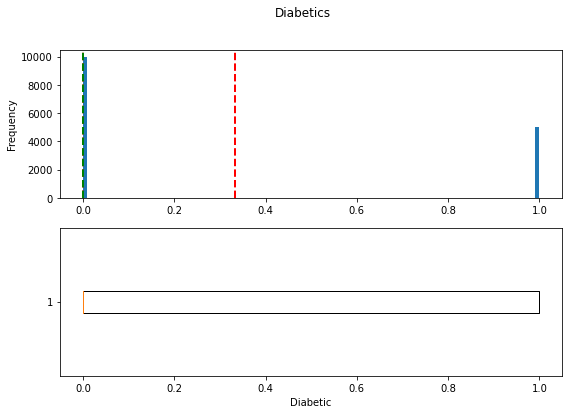

In [9]:
#plot the histogram chart of the target variable to quickly analyse the outliers in there

label = df["Diabetic"]

#plot two types of charts, viz: histogram and boxplot 
fig, ax = plt.subplots(2,1, figsize = (9,6))

ax[0].hist(label, bins=100)
ax[0].set_ylabel("Frequency")

#add some statistical lines such as mean and median lines

ax[0].axvline(label.mean(), linestyle="dashed", linewidth=2.0, color="red")
ax[0].axvline(label.median(), linestyle="dashed", linewidth=2.0, color="red")
ax[0].axvline(label.mode()[0], linestyle="dashed", linewidth=2.0, color="green")
# we shall now plot the boxplot

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel("Diabetic")

#add a super-title
fig.suptitle("Diabetics")
#show the plots / charts
fig.show()

## we would have seen that most persons have no diabetics

In [10]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label    = "Diabetic"

In [11]:
X = df[features].values
y = df[label].values

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 20)

In [14]:
X_train

array([[7.00000000e+00, 7.70000000e+01, 8.90000000e+01, ...,
        4.16210962e+01, 2.47561623e-01, 4.50000000e+01],
       [0.00000000e+00, 5.40000000e+01, 5.30000000e+01, ...,
        4.02480528e+01, 3.02540380e-01, 3.00000000e+01],
       [7.00000000e+00, 1.11000000e+02, 4.90000000e+01, ...,
        2.93024209e+01, 2.03108610e-01, 2.30000000e+01],
       ...,
       [3.00000000e+00, 1.85000000e+02, 7.70000000e+01, ...,
        3.62350309e+01, 6.53664190e-01, 4.40000000e+01],
       [1.00000000e+00, 1.32000000e+02, 9.60000000e+01, ...,
        3.38084063e+01, 9.65323850e-02, 2.20000000e+01],
       [7.00000000e+00, 1.20000000e+02, 7.90000000e+01, ...,
        3.24698290e+01, 5.88256992e-01, 3.80000000e+01]])

In [15]:
reg = 0.01
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C = 0.3, multi_class="multinomial", solver="saga", penalty="elasticnet",\
                                                             fit_intercept=True, l1_ratio=0.8))

In [16]:
model = pipeline.fit(X_train,y_train)

In [22]:
y_pred = model.predict(X_test)
print("The predictions are {}".format(y_pred))
print("The actual labels are {}".format(y_test))
print("The test features are {}".format(X_test))

The predictions are [0 1 0 ... 0 0 1]
The actual labels are [0 1 0 ... 0 1 0]
The test features are [[1.00000000e+00 7.30000000e+01 9.30000000e+01 ... 2.18809700e+01
  4.99129225e-01 2.10000000e+01]
 [1.00000000e+00 1.43000000e+02 9.10000000e+01 ... 4.09052477e+01
  7.91112784e-01 4.60000000e+01]
 [0.00000000e+00 1.15000000e+02 8.80000000e+01 ... 2.05014573e+01
  2.72038099e-01 2.10000000e+01]
 ...
 [8.00000000e+00 9.00000000e+01 8.00000000e+01 ... 2.15905042e+01
  9.46410770e-02 2.10000000e+01]
 [2.00000000e+00 1.16000000e+02 1.00000000e+02 ... 2.99450477e+01
  9.00859447e-01 2.20000000e+01]
 [9.00000000e+00 1.59000000e+02 4.30000000e+01 ... 1.96444376e+01
  6.35976918e-01 4.50000000e+01]]


In [18]:
model.score(X_train, y_train)

0.7861666666666667

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
Accuracy = accuracy_score(y_test, y_pred)

print("The accuracy score is {:.2f}%".format(Accuracy * 100))

The accuracy score is 78.87%


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2012
           1       0.72      0.59      0.65       988

    accuracy                           0.79      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.78      0.79      0.78      3000



<p>From the classification report it is evient to identify some issues in there.<BR>
The precision measures how many correct predictions the model could make<BR>
The recall measures how many of the instances of the class in the dataset the model identify
</p>

In [24]:
model.predict([[0,171,80,34,23,43.509726,1.213191,21]])

array([0], dtype=int64)

In [30]:
y_pred = model.predict([[1,86,70,27,35,42.604536,0.549542,90]])

if y_pred[0] == 0:
    print("Nice one you are not a diabetic patient")
else:
    print("You might need to visit the medical hospital")

You might need to visit the medical hospital


In [33]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

print("The overall precision score {:.2f}%".format(precision_score(y_test, y_pred) * 100))

print("===============================================")

print("The overall recall score {:.2f}%".format(recall_score(y_test, y_pred) * 100))

The overall precision score 71.80%
The overall recall score 59.01%


In [38]:
CM = confusion_matrix(y_test, y_pred)

print(CM)

[[1783  229]
 [ 405  583]]


<strong>You would see from the above confusion matrix is that <br>
    <ol>
        <li>True Negative(TN): the upper left corner is 1783</li>
        <li>True Positive(TP): the bottom right corner is 583</li>
        <li>False Negative(FN): the lower left corner is 405</li>
        <li>False Positive(FP): the upper right corner is 229</li>
    </ol>
</strong>